In [24]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np

<Figure size 1000x600 with 0 Axes>

In [18]:
x = [1, 2, 3, 4, 10]
y = [5,4,3,2,1]

Text(0.5, 1.0, 'Top Left')

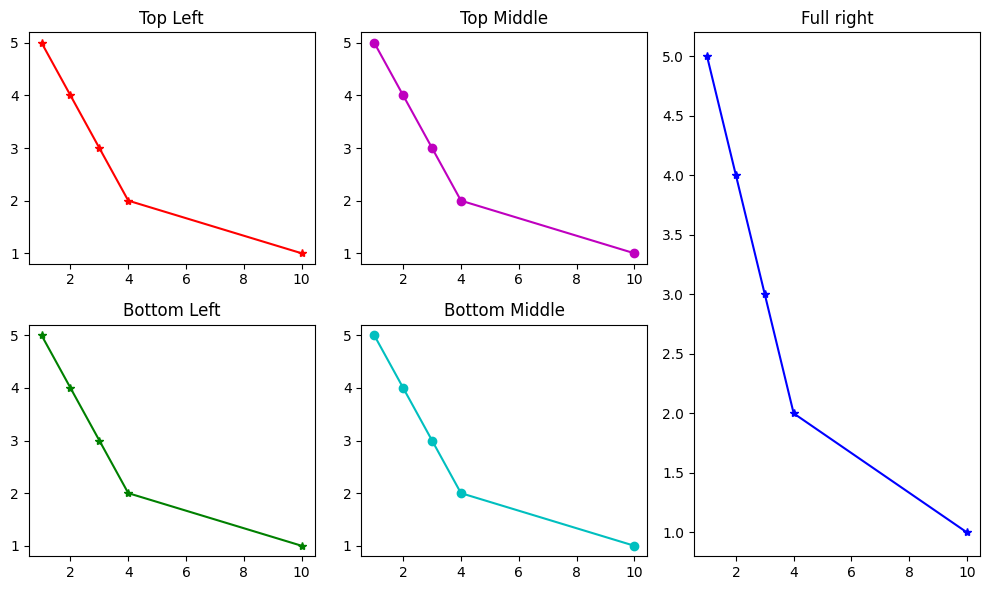

In [19]:
fig = plt.figure(figsize=(10,6))

gs = gridspec.GridSpec(2, 3)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(x,y, 'r-*')
ax1.set_title("Top Left")


ax2 = fig.add_subplot(gs[1,0])
ax2.plot(x,y, 'g-*')
ax2.set_title("Bottom Left")

ax3 = fig.add_subplot(gs[0,1])
ax3.plot(x,y, 'm-o')
ax3.set_title("Top Middle")

ax4 = fig.add_subplot(gs[1,1])
ax4.plot(x,y, 'c-o')
ax4.set_title("Bottom Middle")

ax5 = fig.add_subplot(gs[:,2])
ax5.plot(x,y, 'b-*')
ax5.set_title("Full right")

plt.tight_layout()
plt.show()

In [21]:
df = pd.read_csv("Time Series data.csv")

In [22]:
df.head()

,Avg_Temperature,Ice_Cream_Sales,Power_Cuts
0,25.661274,591.163282,5.0
1,26.560024,657.393558,3.0
2,28.596623,779.978584,4.0
3,28.104512,726.827852,5.0
4,29.889647,775.217459,5.0


In [23]:
df.shape

(120, 3)

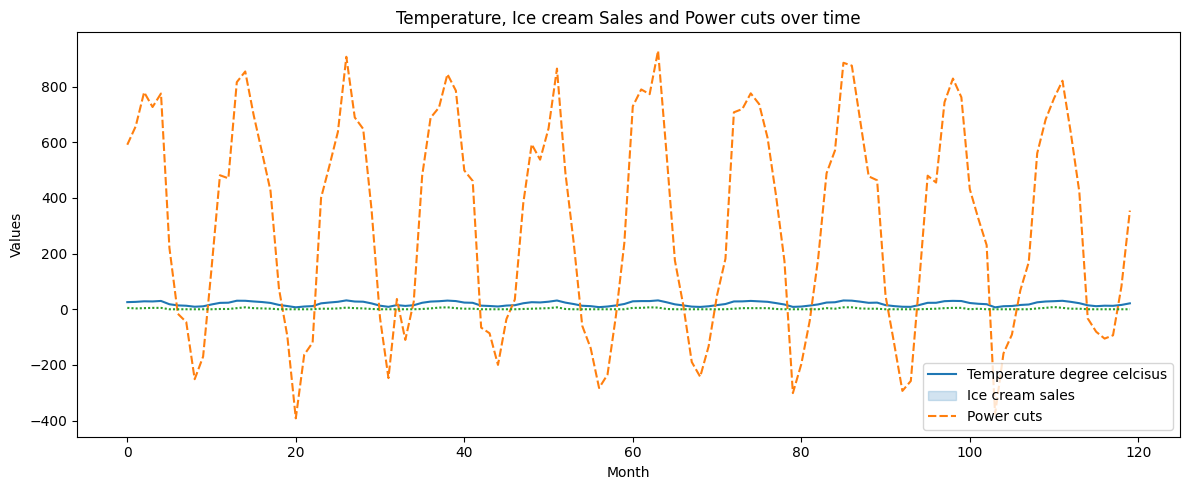

In [28]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df[['Avg_Temperature', 'Ice_Cream_Sales', 'Power_Cuts']])
plt.title("Temperature, Ice cream Sales and Power cuts over time")
plt.xlabel("Month")
plt.ylabel("Values")
plt.legend(["Temperature degree celcisus", "Ice cream sales", "Power cuts"])
plt.tight_layout()
plt.show()

In [33]:
df['Temp_MA_6'] = df['Avg_Temperature'].rolling(window=6).mean()
df['IceCream_Sales_MA_6'] = df['Ice_Cream_Sales'].rolling(window=6).mean()

In [34]:
df.head()

,Avg_Temperature,Ice_Cream_Sales,Power_Cuts,Temp_MA_6,IceCream_Sales_MA_6
0,25.661274,591.163282,5.0,NaN,NaN
1,26.560024,657.393558,3.0,NaN,NaN
2,28.596623,779.978584,4.0,NaN,NaN
3,28.104512,726.827852,5.0,NaN,NaN
4,29.889647,775.217459,5.0,NaN,NaN


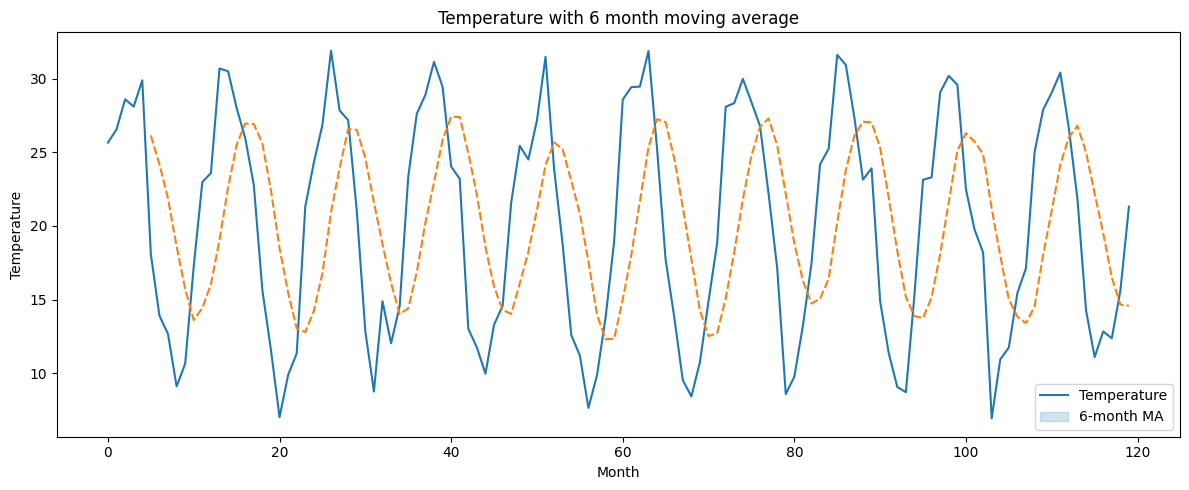

In [35]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df[['Avg_Temperature', 'Temp_MA_6']])
plt.title("Temperature with 6 month moving average")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend(["Temperature", "6-month MA"])
plt.tight_layout()
plt.show()

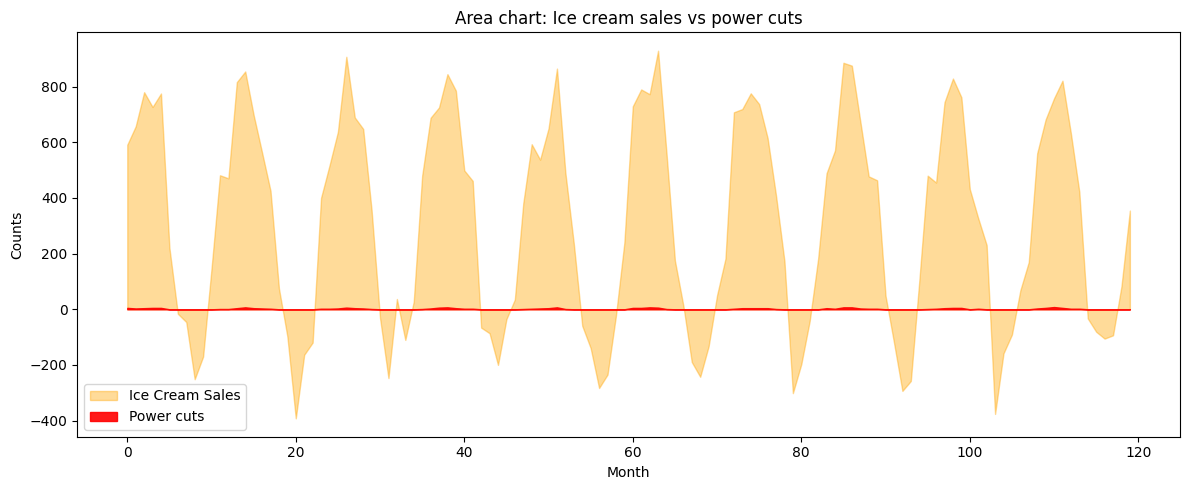

In [40]:
plt.figure(figsize=(12,5))
plt.fill_between(df.index, df['Ice_Cream_Sales'], alpha=0.4, label="Ice Cream Sales", color="orange")
plt.fill_between(df.index, df['Power_Cuts'], alpha=0.9, label="Power cuts", color="red")
plt.title("Area chart: Ice cream sales vs power cuts")
plt.xlabel("Month")
plt.ylabel("Counts")
plt.legend()
plt.tight_layout()
plt.show()

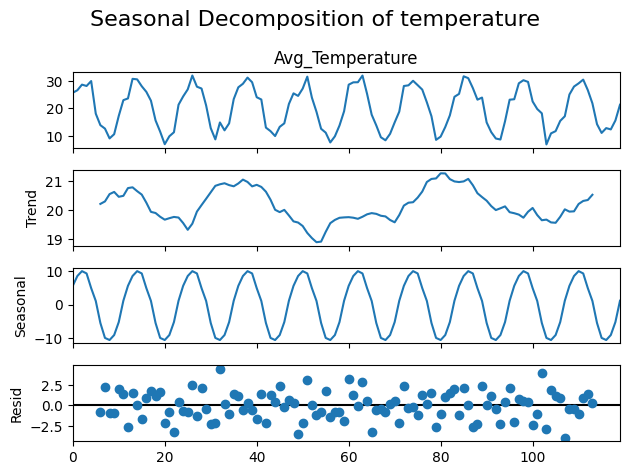

In [42]:
result = seasonal_decompose(df['Avg_Temperature'], model='additive', period=12)
result.plot()
plt.suptitle("Seasonal Decomposition of temperature", fontsize=16)
plt.tight_layout()
plt.show()